In [52]:
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29


In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import numpy as np

# Patch for NumPy 2.0+ removing np.float_
if not hasattr(np, "float_"):
    np.float_ = np.float64


from crewai import Agent, Task, Crew
from langchain_openai import ChatOpenAI

openai_llm = ChatOpenAI(
    api_key="use_your_github_models_api_key",
    base_url="https://models.github.ai/inference",
    model="openai/gpt-4.1-mini"
)


In [55]:
researcher = Agent(
    role="Research Agent",
    goal="Collect accurate and trending insights on {topic} "
         "for creating engaging Instagram content.",
    backstory="You are a social media research expert who finds the latest trends, "
              "facts, statistics, and emotional hooks about the given topic {topic}.",
    allow_delegation=False,
    verbose=True,
    llm=openai_llm
)


In [56]:
writer = Agent(
    role="Content Writer",
    goal="Write engaging Instagram captions (short & long) with relevant hashtags "
         "and a strong call-to-action for {topic}.",
    backstory="You are a skilled Instagram content writer who crafts viral captions "
              "from the research notes provided by the Research Agent.",
    allow_delegation=False,
    verbose=True,
    llm=openai_llm
)


In [57]:
reviewer = Agent(
    role="Reviewer",
    goal="Review and edit the Instagram content to ensure clarity, grammar, tone, "
         "and engagement quality.",
    backstory="You are an experienced social media editor who ensures all content is "
              "error-free, emotionally appealing, and on-brand.",
    allow_delegation=False,
    verbose=True,
    llm=openai_llm
)


In [58]:
image_prompt_agent = Agent(
    role="Image Prompt Generator",
    goal="Generate 2–3 detailed and creative text-to-image prompts for the topic {topic}",
    backstory="You are an AI designer who creates stunning prompt descriptions "
              "for tools like DALL·E, Midjourney, or Stable Diffusion.",
    allow_delegation=False,
    verbose=True,
    llm=openai_llm
)



In [59]:
research_task = Task(
    description=(
        "1. Gather the latest stats, trends, and facts on {topic}.\n"
        "2. Identify emotional hooks and audience interests.\n"
        "3. Provide a bullet list of 6-8 key insights for Instagram content."
    ),
    expected_output="A list of key insights and reference links.",
    agent=researcher
)


In [60]:
write_task = Task(
    description=(
        "1. Use research data to write:\n"
        "   - A short catchy Instagram caption (1–2 lines).\n"
        "   - A long descriptive caption (3–4 paragraphs).\n"
        "2. Include 5-7 relevant hashtags.\n"
        "3. Add a strong call-to-action (CTA)."
    ),
    expected_output="A draft Instagram post with short caption, long caption, hashtags, and CTA.",
    agent=writer
)


In [61]:
review_task = Task(
    description=(
        "Review the Instagram draft for grammar, tone, clarity, and engagement. "
        "Make it more concise, attractive, and aligned with social media style."
    ),
    expected_output="A final polished Instagram caption (short & long) with final hashtags.",
    agent=reviewer
)


In [62]:
image_prompt_task = Task(
    description=(
        "Based on the final content, create 2–3 vivid image prompts "
        "suitable for text-to-image tools like Stable Diffusion, Nano Banana, or Segmind. "
        "Each prompt should include style, mood, objects, and color scheme."
    ),
    expected_output="2–3 text prompts ready for an image generation API.",
    agent=image_prompt_agent
)


In [63]:
crew = Crew(
    agents=[researcher, writer, reviewer, image_prompt_agent],
    tasks=[research_task, write_task, review_task, image_prompt_task],
    verbose=2
)


In [64]:
topic = "The Future of Electric Cars"

result = crew.kickoff(inputs={"topic": topic})

from IPython.display import Markdown
Markdown(result)


 [DEBUG]: == Working Agent: Research Agent
 [INFO]: == Starting Task: 1. Gather the latest stats, trends, and facts on The Future of Electric Cars.
2. Identify emotional hooks and audience interests.
3. Provide a bullet list of 6-8 key insights for Instagram content.


> Entering new CrewAgentExecutor chain...


Thought: I now can give a great answer

Final Answer:

**Key Insights on The Future of Electric Cars for Engaging Instagram Content**

1. **Explosive Growth in EV Adoption**  
   By 2030, electric vehicles (EVs) are projected to make up nearly 60% of new car sales globally, up from just 8.3% in 2023. This rapid adoption is driven by government incentives, falling battery costs, and increasing environmental awareness.  
   *Source:* International Energy Agency (IEA), Global EV Outlook 2024 - https://www.iea.org/reports/global-ev-outlook-2024

2. **Battery Technology Breakthroughs**  
   Solid-state batteries, promising faster charging, longer range (up to 500+ miles), and improved safety, are expected to hit the market within the next 5 years, revolutionizing the EV experience. This tech leap could make electric cars more affordable and convenient than gasoline vehicles.  
   *Source:* BloombergNEF, Battery Technology Trends 2024 - https://about.bnef.com/blog/solid-state-battery-breakth

Thought: I now can give a great answer  
Final Answer:

**Short Caption:**  
Charge into the future ⚡️ 60% of new cars will be electric by 2030 — are you ready to make the switch? #DriveElectric

**Long Caption:**  
The future of driving is electric, and it’s arriving faster than ever. By 2030, nearly 60% of all new cars sold worldwide will be electric vehicles (EVs), driven by breakthroughs in battery technology, expanding charging networks, and aggressive government policies. Imagine zipping 500+ miles on a single charge thanks to cutting-edge solid-state batteries, while charging your car faster than ever before — 200 miles in just 15 minutes. The EV revolution isn’t just about technology; it’s about cleaner air, quieter streets, and a healthier planet.

Costs are dropping dramatically, too. Battery prices have fallen by nearly 90% since 2010, bringing electric cars closer to price parity with traditional gasoline vehicles — making them more accessible to everyone. Beyond affordabil

Thought: I now can give a great answer  
Final Answer:  

**Short Caption:**  
Charge into the future ⚡️ By 2030, 60% of new cars will be electric. Are you ready to make the switch? #DriveElectric #EVRevolution  

**Long Caption:**  
The future of driving is electric — and it’s arriving faster than ever. By 2030, nearly 60% of all new cars sold worldwide will be electric vehicles (EVs). Thanks to breakthroughs in battery tech, expanding charging networks, and strong government support, driving electric is becoming easier and more exciting. Imagine going 500+ miles on a single charge with cutting-edge solid-state batteries, and charging 200 miles in just 15 minutes.  

But the EV revolution isn’t just about technology — it’s about cleaner air, quieter streets, and a healthier planet. Battery costs have dropped nearly 90% since 2010, making EVs more affordable and accessible than ever before. Beyond savings, EVs offer a lifestyle upgrade: smart, connected, and tailored to your digital li

1. **Prompt 1:**  
A sleek, futuristic electric car gliding silently on a sunlit highway that stretches into a vibrant, green cityscape of 2030. The car features smooth aerodynamic curves, illuminated digital displays on the windshield, and solar panels integrated seamlessly into its roof. Surrounding the vehicle are charging stations with glowing blue and green energy symbols, showing rapid charging in progress. The background includes wind turbines and solar farms, symbolizing clean energy sources powering the city. The scene is bathed in warm, golden hour light with a color palette of electric blues, bright greens, and metallic silvers, evoking feelings of hope, innovation, and sustainability. Style: hyper-realistic with cinematic lighting and futuristic design elements. Mood: inspiring, optimistic, and high-tech.  

2. **Prompt 2:**  
An autonomous electric car interior of the future, glowing softly with ambient neon purple and cyan lights. The dashboard is a massive curved touchscreen displaying navigation, energy usage, and AI assistant visuals. The seats are customizable with eco-friendly materials and embedded smart controls, surrounded by holographic interfaces and transparent solar glass windows showing a serene urban park outside. Outside the window, other electric vehicles and drones move seamlessly in a clean, quiet smart city with lush greenery and zero emissions. The color scheme blends cool blues, purples, and soft whites to create a calming yet futuristic atmosphere. Style: digital art with cyberpunk and minimalistic influences. Mood: futuristic, serene, and connected.  

3. **Prompt 3:**  
A dynamic street scene in 2030 depicting diverse people happily interacting around electric cars parked at a bustling community charging hub. Families, young professionals, and green energy advocates are engaged in conversations, sharing EV tips, and charging their vehicles under solar-powered canopies. The vehicles vary from compact city EVs to sleek electric SUVs, all with glowing charging cables and digital badges showing battery status. The environment highlights urban sustainability with vertical gardens, bike lanes, and electric scooters. The color scheme is vibrant with fresh greens, bright yellows, and clean whites, conveying energy, community, and progress. Style: vibrant, semi-realistic illustration with a focus on inclusivity and environment. Mood: energetic, hopeful, and community-driven.

Generating image for prompt 1: A futuristic city skyline at sunset, ultra-realistic, 8k


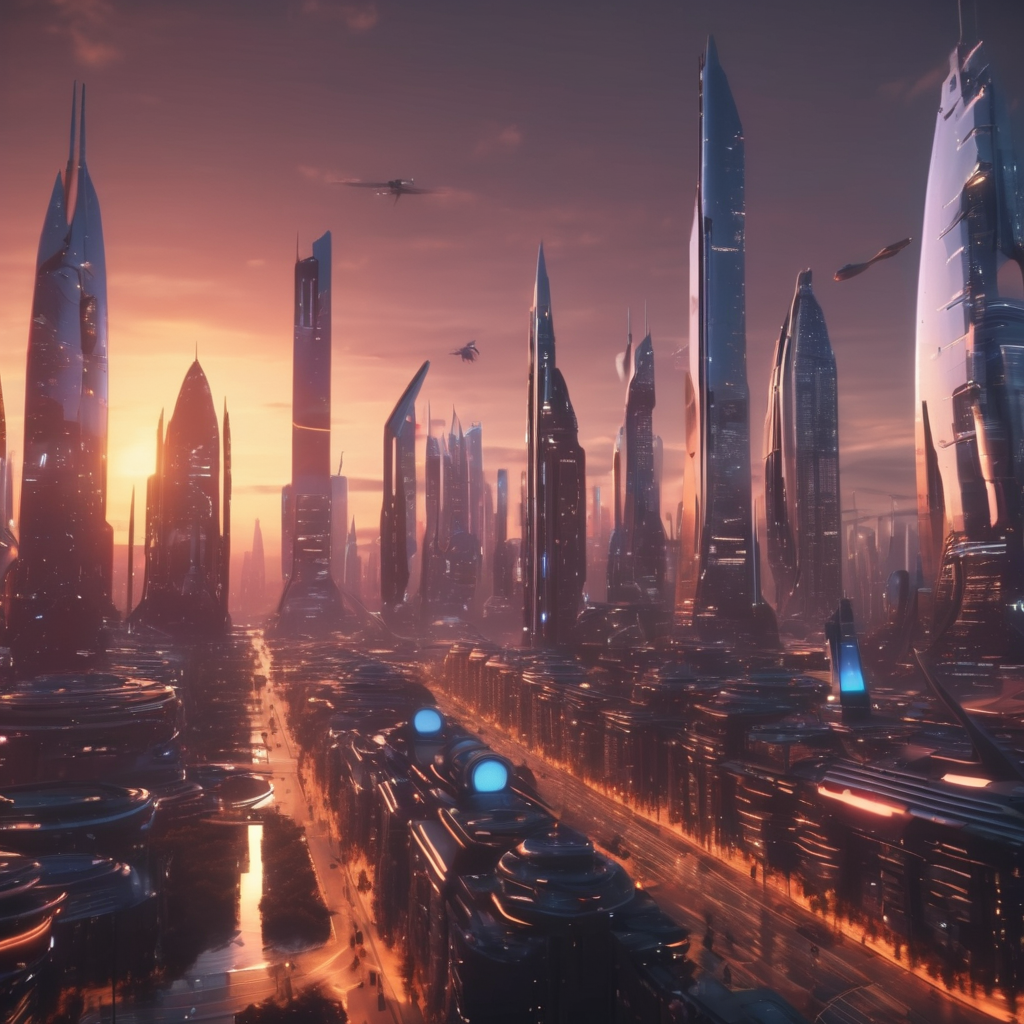

In [68]:
import json, re, requests, base64
from IPython.display import Image as IPyImage, display

# Crew output dict -> text
result_text = json.dumps(result, indent=2)

# Extract image prompts generated by Image Prompt Agent
# (Assuming they are in a bullet list: "- prompt text")
prompt_lines = re.findall(r'- (.*?)\n', result_text)

# Fallback prompt if none found
if len(prompt_lines) < 1:
    prompt_lines = ["A futuristic city skyline at sunset, ultra-realistic, 8k"]

api_key = "use_your_stability.ai_api_key"

url = "https://api.stability.ai/v1/generation/stable-diffusion-xl-1024-v1-0/text-to-image"
headers = {
    "Authorization": f"Bearer {api_key}",
    "Accept": "application/json",
    "Content-Type": "application/json"
}

# Loop through all prompts (max 3)
for idx, p in enumerate(prompt_lines[:3], start=1):
    print(f"Generating image for prompt {idx}: {p}")

    data = {
        "text_prompts": [{"text": p}],
        "cfg_scale": 7,
        "clip_guidance_preset": "FAST_BLUE",
        "height": 1024,
        "width": 1024,
        "samples": 1,
        "steps": 30
    }

    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200 and "artifacts" in response.json():
        img_base64 = response.json()["artifacts"][0]["base64"]
        img_bytes = base64.b64decode(img_base64)
        display(IPyImage(data=img_bytes))
    else:
        print("Request failed:", response.status_code, response.text)


